In [4]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

###### Obtaining all the csv Files

In [5]:
#@author Tasneem
crime2017_csv = "Resources/OhioCrime2017_NoNan.csv"
crime2016_csv = "Resources/OhioCrime2016_NoNan.csv"
crime2015_csv = "Resources/OhioCrime2015_NoNan.csv"
crime2014_csv = "Resources/OhioCrime2014_NoNan.csv"
crime2013_csv = "Resources/OhioCrime2013_NoNan.csv"
crime2012_csv = "Resources/OhioCrime2012_NoNan.csv"
Zillow_Ohio_csv = "Resources/newZillowOH_Data.csv"
Ohio_Crime_csv = "Resources/CrimeData_merged.csv"

In [6]:
#File Containing Data for Zillow
zillow_df = pd.read_csv(Zillow_Ohio_csv)
zillow_df = zillow_df.fillna(0)

#File Containing Data for Crime (2014-2017)
ohiocrime_df = pd.read_csv(Ohio_Crime_csv)
ohiocrime_df = ohiocrime_df.fillna(0)

In [7]:
#Renaming the COlumns for Zillow Data
zillow_df = zillow_df.rename(columns={"RegionName": "City", "2017": "2017 Median Price", "2016":"2016 Median Price",
                                     "2015": "2015 Median Price", "2014": "2014 Median Price", "2013":"2013 Median Price",
                                     "2012":"2012 Median Price"})
zillow_df.columns

Index(['RegionID', 'City', 'StateName', 'SizeRank', '2012 Median Price',
       '2013 Median Price', '2014 Median Price', '2015 Median Price',
       '2016 Median Price', '2017 Median Price'],
      dtype='object')

**Merging the Data from Crime and Housing.**
**And calculating the Crime rate for each year and adding it to the Dataframe**

In [8]:
#The csv obtained in this code is just for reference and is not used further in the code.
merge_Zillow_Crime_df = pd.merge(ohiocrime_df, zillow_df, on = "City")
merge_Zillow_Crime_df.to_csv("CrimeZillow_MergeData.csv")
merge_Zillow_Crime_df.head()

merge_Zillow_Crime_df=merge_Zillow_Crime_df.sort_values("2017 Population", ascending=False)
merge_ZillowCrime_df = merge_Zillow_Crime_df.drop_duplicates()
merge_ZillowCrime_df
merge_Zillow_Crime_df.to_csv("SortedCrimeZillow_MergeData.csv")

In [9]:

merge_Zillow_Crime_df["Crime Rate 2017"] = ((merge_Zillow_Crime_df["2017 Violent Crime"])/(merge_Zillow_Crime_df["2017 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2016"] = ((merge_Zillow_Crime_df["2016 Violent Crime"])/(merge_Zillow_Crime_df["2016 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2015"] = ((merge_Zillow_Crime_df["2015 Violent Crime"])/(merge_Zillow_Crime_df["2015 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2014"] = ((merge_Zillow_Crime_df["2014 Violent Crime"])/(merge_Zillow_Crime_df["2014 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2013"] = ((merge_Zillow_Crime_df["2013 Violent Crime"])/(merge_Zillow_Crime_df["2013 Population"]))*100000

merge_Zillow_Crime_df.reset_index().tail()

,index,Unnamed: 0,Unnamed: 0_x,County_x,City,2017 Population,2017 Violent Crime,2017 Murder,2017 Rape,2017 Robbery,...,2013 Median Price,2014 Median Price,2015 Median Price,2016 Median Price,2017 Median Price,Crime Rate 2017,Crime Rate 2016,Crime Rate 2015,Crime Rate 2014,Crime Rate 2013
120,10,332,643,Clermont County,Loveland,823,0,0,0,0,...,0,0,0,0,1630000,0.0,0.000000,0.000000,50.479556,51.046452
121,102,274,530,Summit County,Tallmadge,287,0,0,0,0,...,1084600,1753500,1697000,1735400,1868000,0.0,133.619938,98.665119,133.302423,NaN
122,51,181,359,Franklin County,New Albany,168,0,0,0,0,...,4896800,4655800,5024200,5159200,5888300,0.0,48.971596,52.460392,33.141847,22.875443
123,39,114,199,Fairfield County,Pickerington,76,0,0,0,0,...,2065800,2292400,2283300,2466800,2685000,0.0,80.144260,NaN,NaN,NaN
124,54,142,251,Dayton,Centerville,2,0,0,0,0,...,1842400,1873600,1770600,1963900,1979400,0.0,54.505052,58.611739,96.045434,NaN


- Ploting for top 5 populated city, just picking the first 5, as it is sorted with Population.
- Ploting the line graph
- Ploting the line regression and obtaining the p-value

<IPython.core.display.Javascript object>


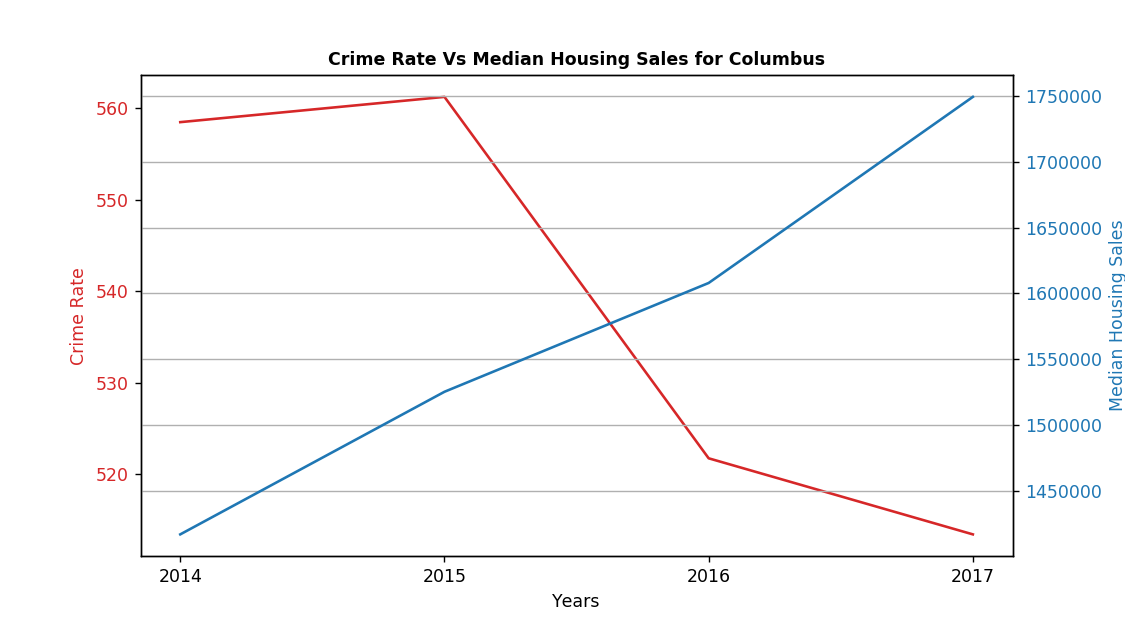

<IPython.core.display.Javascript object>


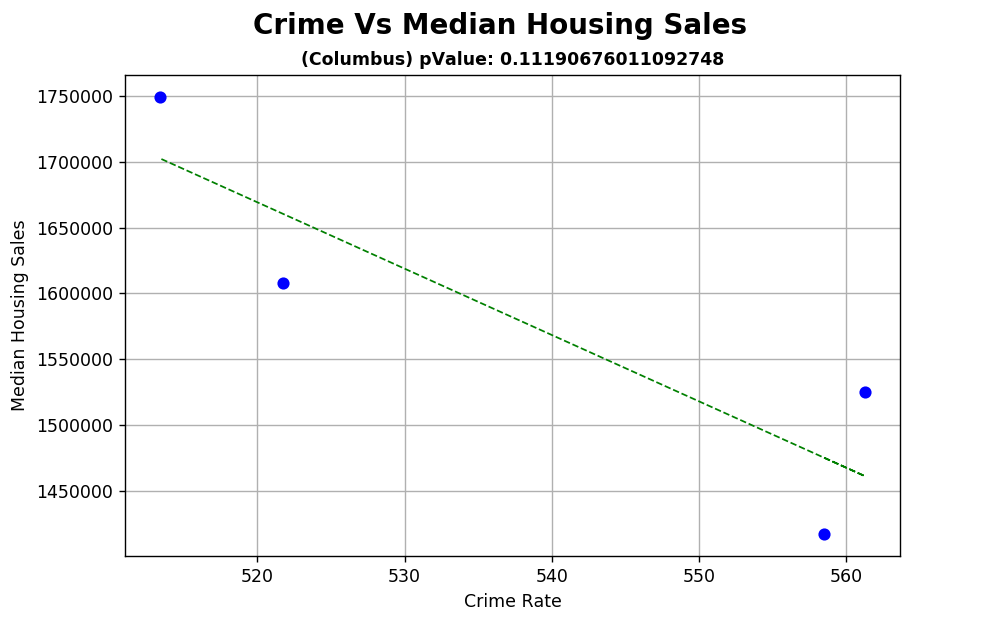

<IPython.core.display.Javascript object>


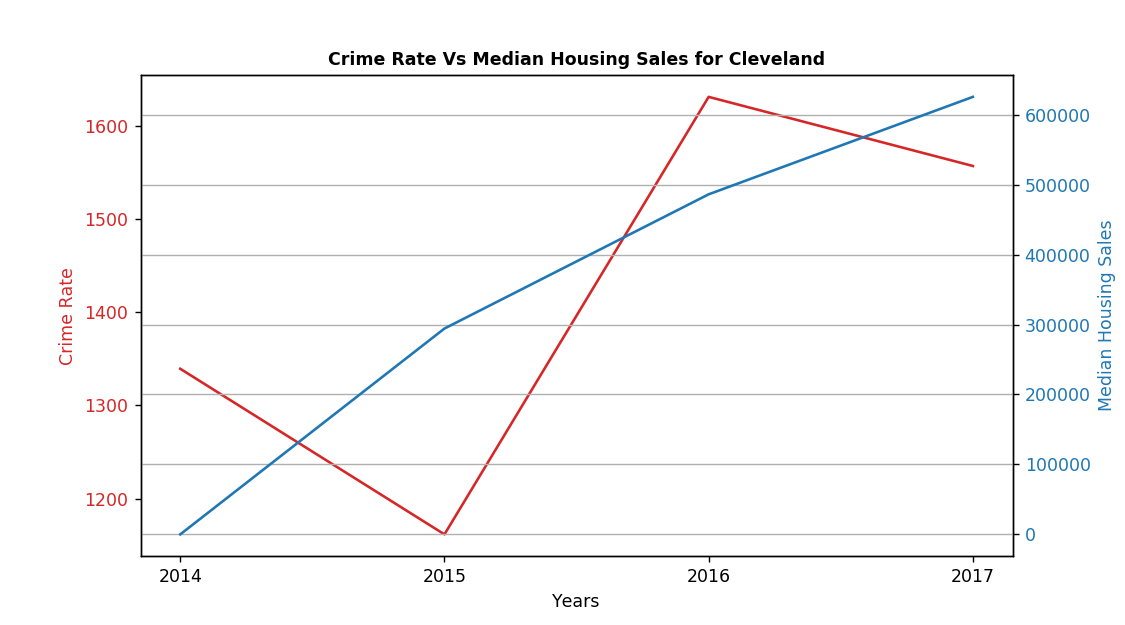

<IPython.core.display.Javascript object>


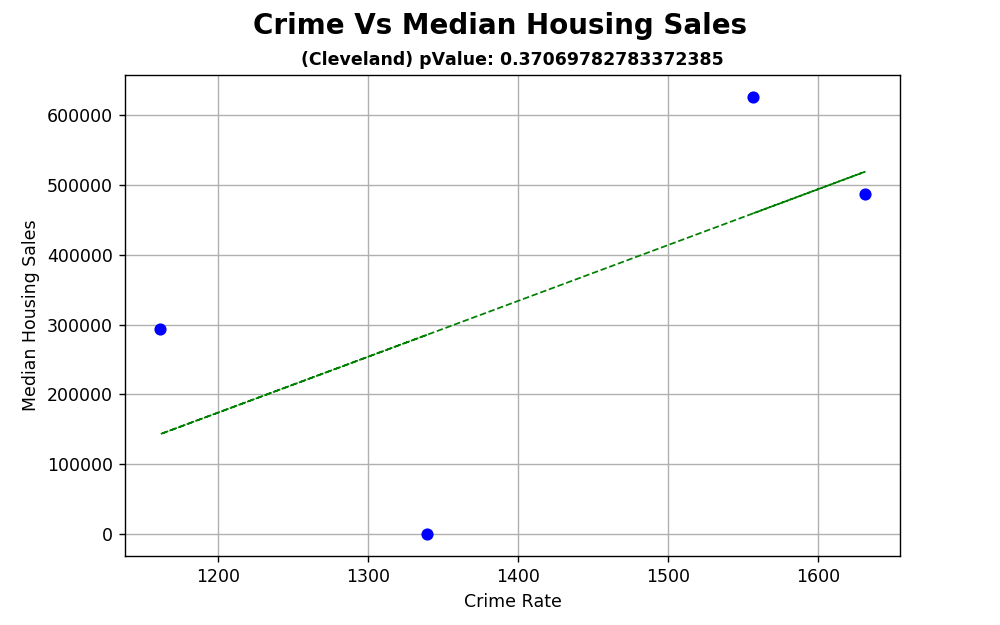

<IPython.core.display.Javascript object>


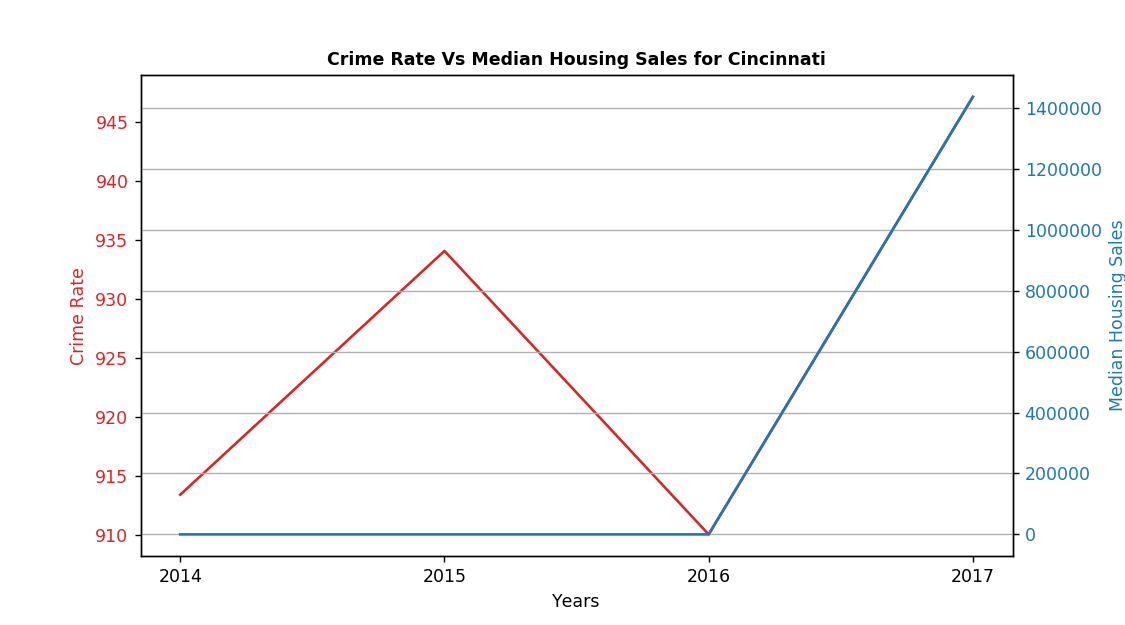

<IPython.core.display.Javascript object>


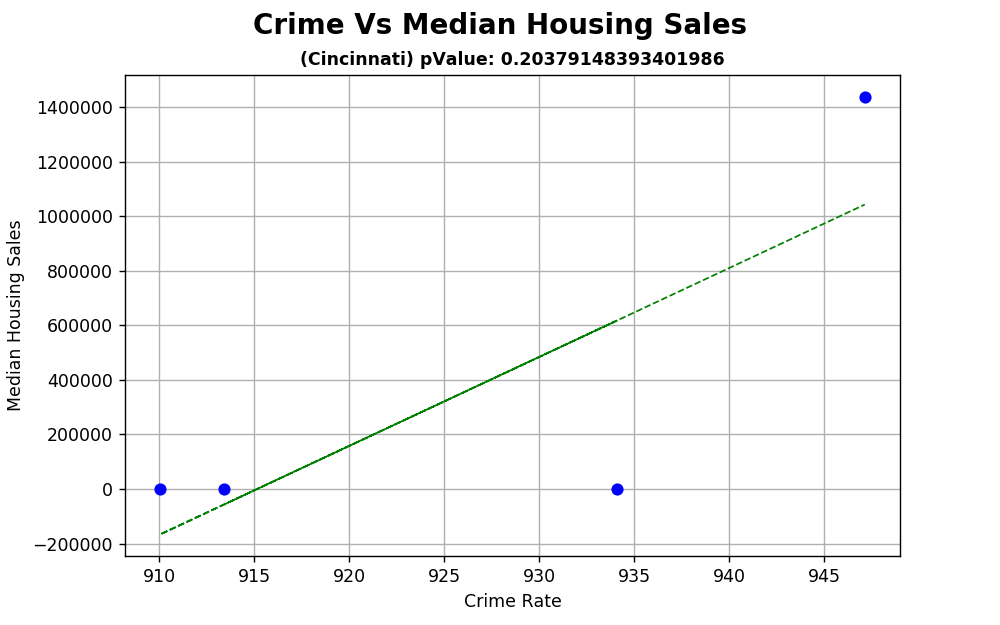

<IPython.core.display.Javascript object>


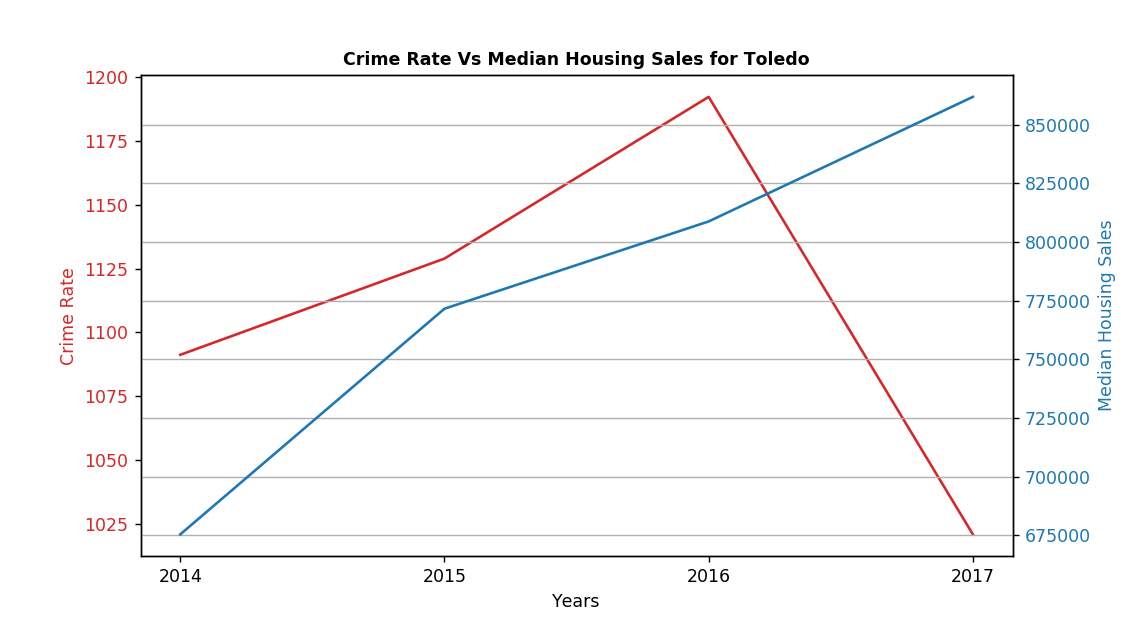

<IPython.core.display.Javascript object>


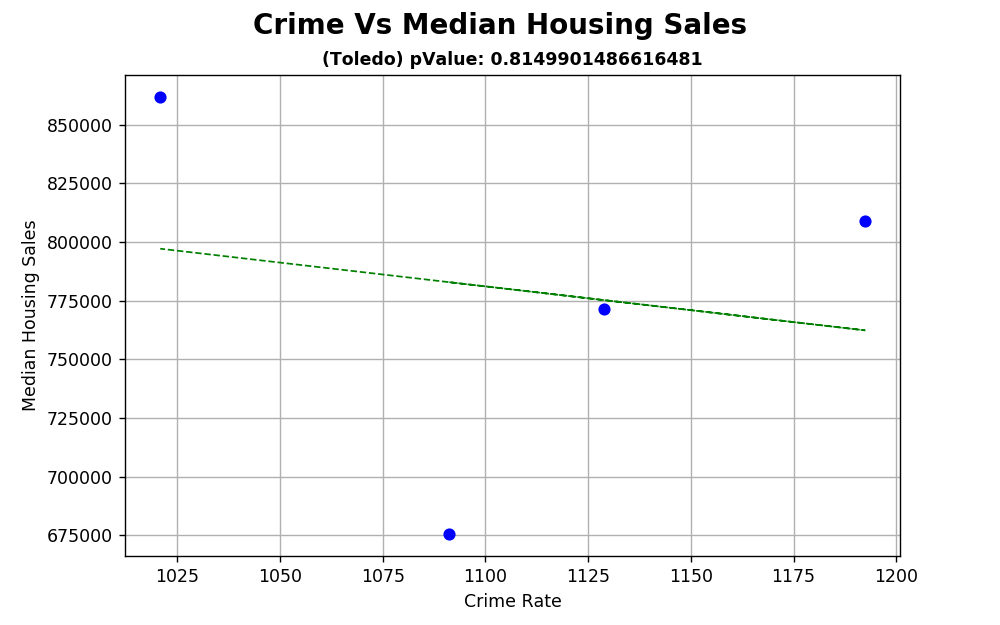

<IPython.core.display.Javascript object>


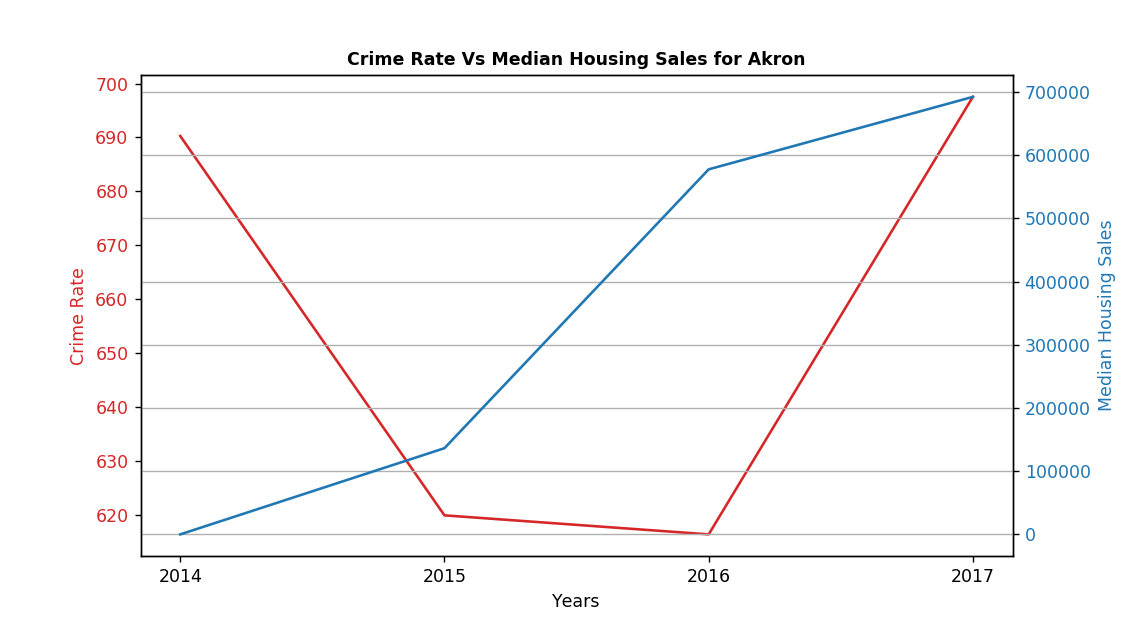

<IPython.core.display.Javascript object>


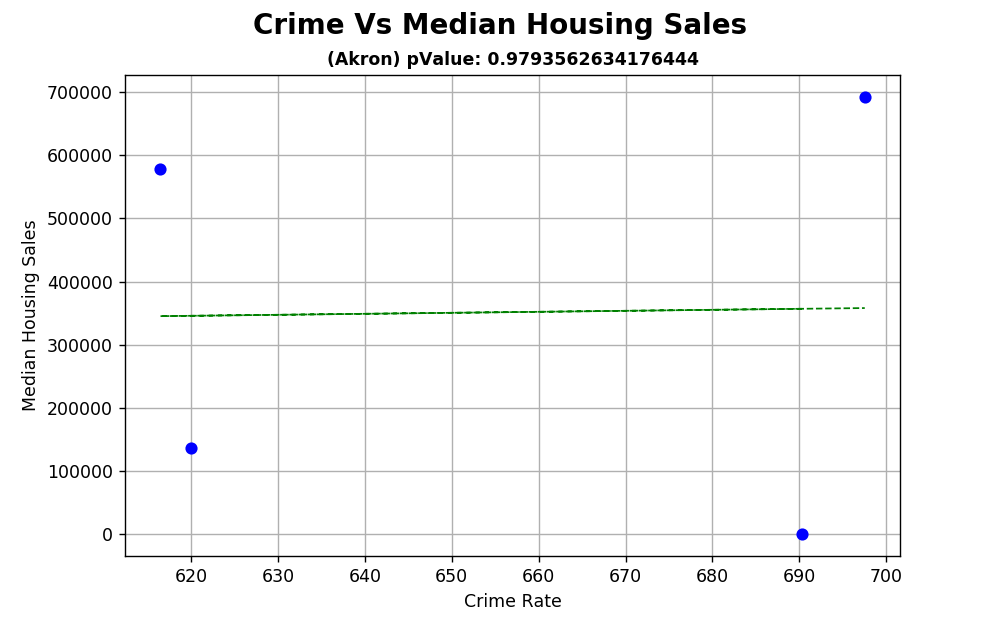

In [10]:
#@author Tasneem
#Retrieving data to plot for A City (index in the iLoc below will retrieve a City)
years =  ["2014","2015","2016","2017"]
citygraphs = [0,1,2,3,4]

for gCount in citygraphs:
    city1Data = merge_Zillow_Crime_df.iloc[gCount,:]
    cityPercent = [city1Data["Crime Rate 2014"],city1Data["Crime Rate 2015"],city1Data["Crime Rate 2016"],city1Data["Crime Rate 2017"]]
    housingMedian = [city1Data["2014 Median Price"],city1Data["2015 Median Price"],city1Data["2016 Median Price"],city1Data["2017 Median Price"]]
    plot_mergeData_df = pd.DataFrame({"Years" : years, "CrimeRate" : cityPercent, "Housing_Median" : housingMedian })

    plot_years = plot_mergeData_df["Years"]
    crimeRate = pd.to_numeric(plot_mergeData_df["CrimeRate"])
    housingMedian =  plot_mergeData_df["Housing_Median"]
    citiName = city1Data["City"]


    fig, ax1 = plt.subplots(figsize=(9,5))

    #Plotting Crime Percent
    color = 'tab:red'
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Crime Rate', color=color)
    ax1.plot(plot_years, crimeRate, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

     # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx() 

    #Plotting Housing Median
    color = 'tab:blue'
    ax2.set_ylabel('Median Housing Sales', color=color)  # we already handled the x-label with ax1
    ax2.plot(plot_years, housingMedian, color=color)
    ax2.tick_params(axis='y', labelcolor=color)


    #fig.tight_layout()
    plt.grid(True)
    plt.title("Crime Rate Vs Median Housing Sales for " + citiName,fontsize=10, fontweight="bold")

    plt.savefig("images/plots/CrimeVsHousingMedian_Yearly_"+citiName+".png")


    # Regression for Each City (over 3 years)
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(crimeRate, housingMedian)
    fit = vc_slope * crimeRate + vc_int

    # Plot data
    fig, ax = plt.subplots(figsize=(8,5))

    plt.suptitle("Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")


    ax.set_xlabel("Crime Rate")
    ax.set_ylabel("Median Housing Sales")

    ax.plot(crimeRate, housingMedian, linewidth=0, marker='o',color="b")
    ax.plot(crimeRate, fit, 'g--', linewidth=1)

    plt.grid(True)
    plt.title("(" + citiName+") pValue: "+ str(vc_p),fontsize=10, fontweight="bold")

    plt.savefig("images/plots/"+citiName+"_pValue.png")
    #plt.show()

- Plotting a bar graph for the top 20 poulated cities, Crime Rate Vs Housing Median for year 2017
- Plotting a line regression and obtaining the pvalue


<IPython.core.display.Javascript object>


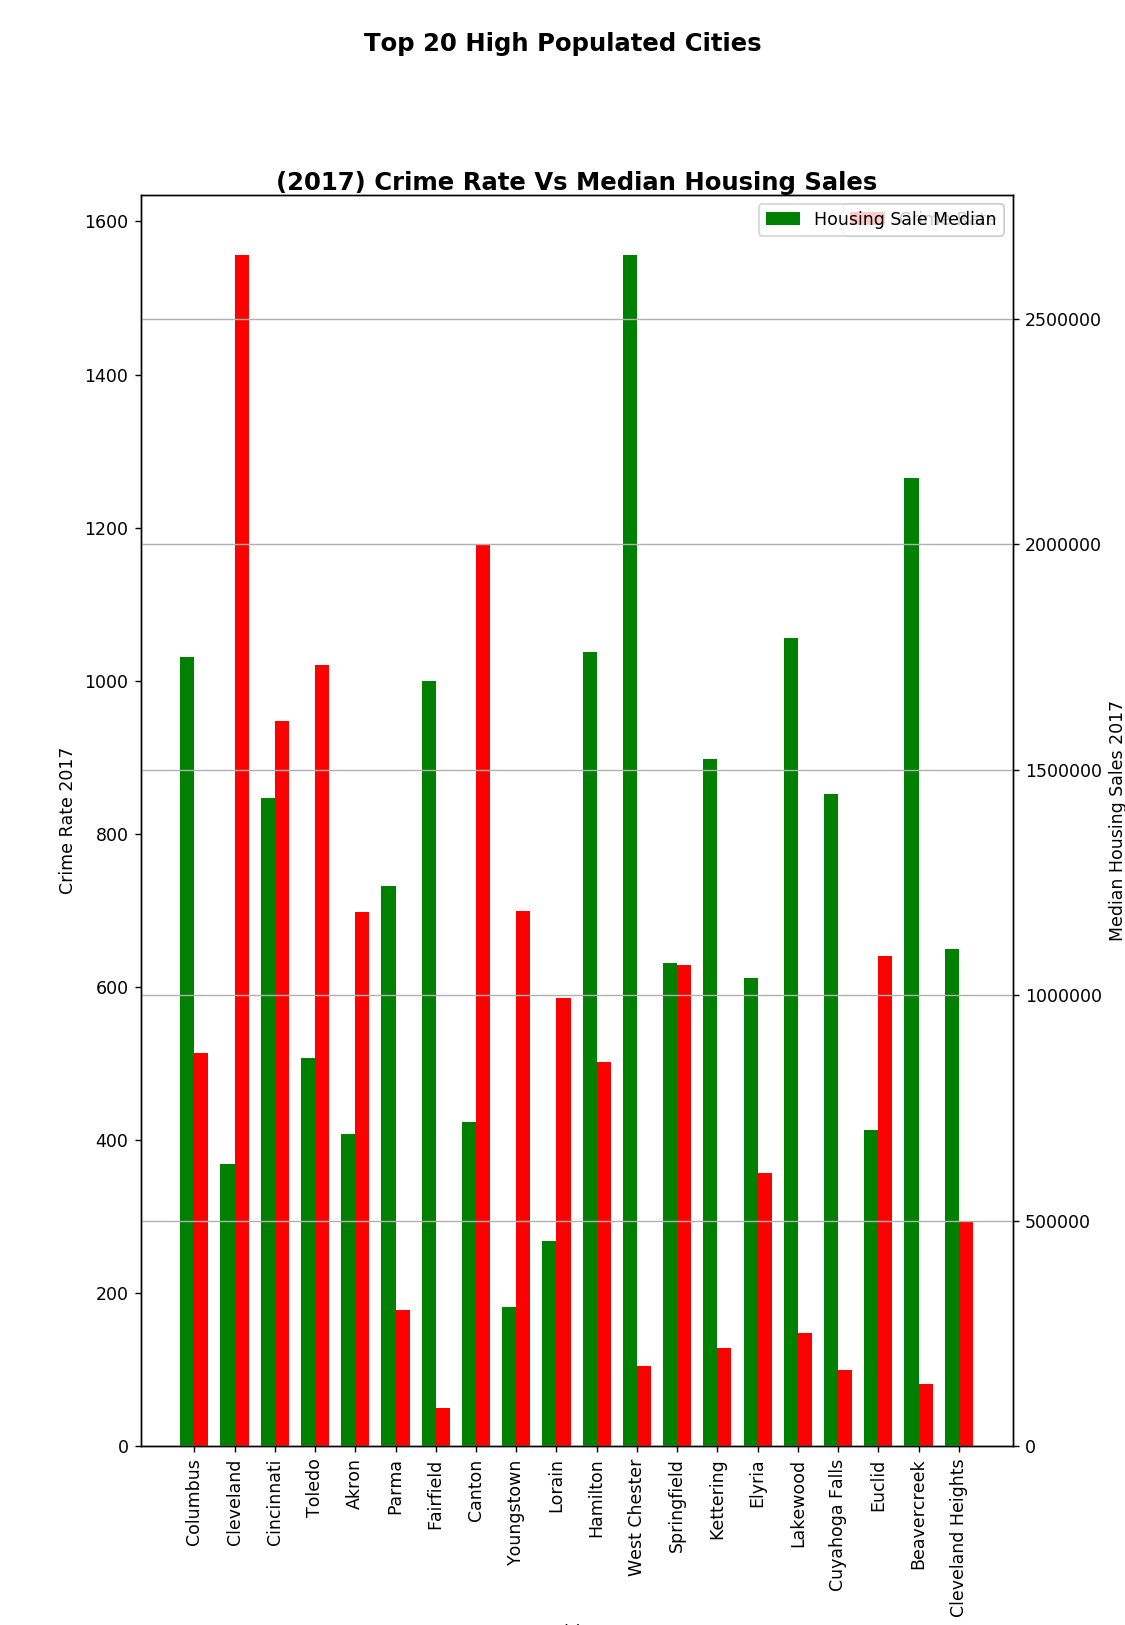

In [11]:
#@author Tasneem
city20 = merge_Zillow_Crime_df.head(20)
labelcity = city20["City"].tolist()
#print(labelcity)
#plottiing a graph for just 20 cities
crime20_rate2017 = pd.to_numeric(city20["Crime Rate 2017"])
housing20_median2017 = pd.to_numeric(city20["2017 Median Price"])

x = np.arange(len(labelcity))  # the label locations
#print(x)
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(9,13))
#Plotting Crime Percent
#color = 'tab:red'
ax1.set_xlabel('Cities')
ax1.set_ylabel('Crime Rate 2017')
ax1.bar(x + width/2, crime20_rate2017, width, label='Crime Rate', color='r')
ax1.set_xticks(x)
ax1.set_xticklabels(labelcity,rotation='vertical')
ax1.legend()
 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 

#Plotting Housing Median
#color = 'tab:blue'
ax2.set_ylabel('Median Housing Sales 2017')  # we already handled the x-label with ax1
ax2.bar(x - width/2, housing20_median2017, width, label='Housing Sale Median', color='g')

fig.suptitle("Top 20 High Populated Cities",fontsize=14, fontweight="bold",va='top')
#fig.tight_layout()

plt.legend(loc='best')
plt.grid(True)
plt.title("(2017) Crime Rate Vs Median Housing Sales", fontsize=14, fontweight="bold",va='top')

plt.show()

plt.savefig("images/plots/CrimeVsHousingMedian_2017_top20.png")

<IPython.core.display.Javascript object>


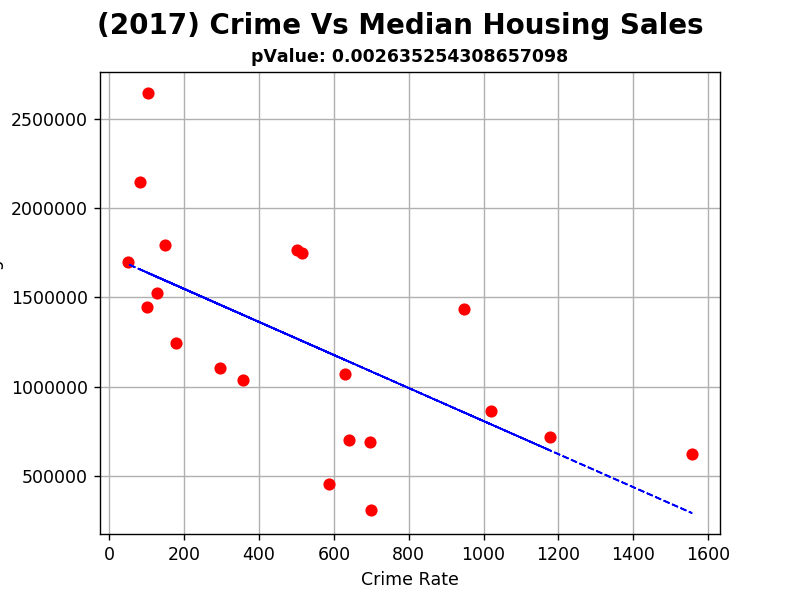

In [12]:
#@author Tasneem
# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime20_rate2017, housing20_median2017)

fit = vc_slope * crime20_rate2017 + vc_int

# Plot data
fig, ax = plt.subplots()
fig.suptitle("(2017) Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")

ax.set_xlabel("Crime Rate")
ax.plot(crime20_rate2017, housing20_median2017, linewidth=0, marker='o',color="r")
ax.plot(crime20_rate2017, fit, "b--", linewidth=1)
ax.set_ylabel("Median Housing Sales")
plt.grid(True)
plt.title("pValue: "+ str(vc_p),fontsize=10, fontweight="bold")
plt.show()

plt.savefig("images/plots/CrimeVsHousingMedian_2017_top20_PVALUE.png")

- Plotting a bar graph for the top 20 poulated cities, Crime Rate Vs Housing Median for year 2016
- Plotting a line regression and obtaining the pvalue


<IPython.core.display.Javascript object>


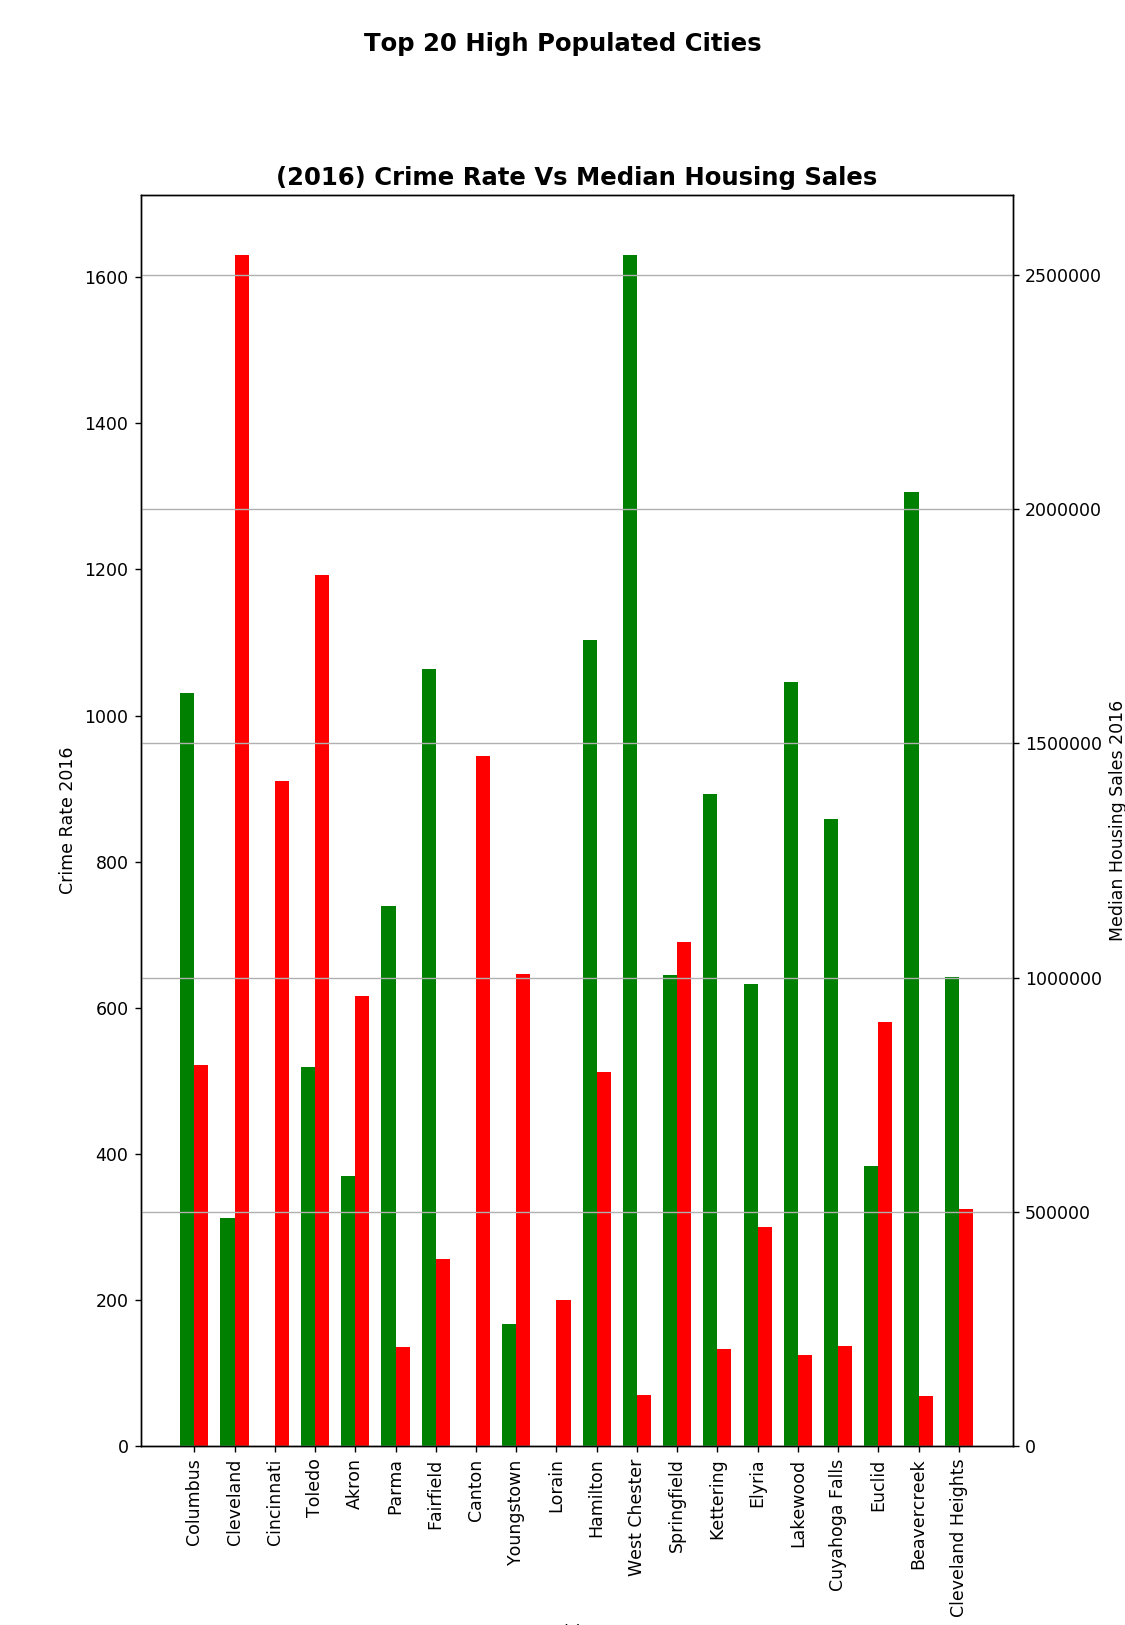

In [13]:
#@author Tasneem

#plottiing a graph for just 20 cities
crime20_rate2016 = pd.to_numeric(city20["Crime Rate 2016"])
housing20_median2016 = pd.to_numeric(city20["2016 Median Price"])

x = np.arange(len(labelcity))  # the label locations
#print(x)
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(9,13))
#Plotting Crime Percent
#color = 'tab:red'
ax1.set_xlabel('Cities')
ax1.set_ylabel('Crime Rate 2016')
ax1.bar(x + width/2, crime20_rate2016, width, label='Crime Rate', color='r')
ax1.set_xticks(x)
ax1.set_xticklabels(labelcity,rotation='vertical')

 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 

#Plotting Housing Median
#color = 'tab:blue'
ax2.set_ylabel('Median Housing Sales 2016')  # we already handled the x-label with ax1
ax2.bar(x - width/2, housing20_median2016, width, label='Housing Sale Median', color='g')

fig.suptitle("Top 20 High Populated Cities",fontsize=14, fontweight="bold")
#fig.tight_layout()
plt.grid(True)
plt.title("(2016) Crime Rate Vs Median Housing Sales", fontsize=14, fontweight="bold")

plt.show()
plt.savefig("images/plots/CrimeVsHousingMedian_2016_top20.png")

<IPython.core.display.Javascript object>


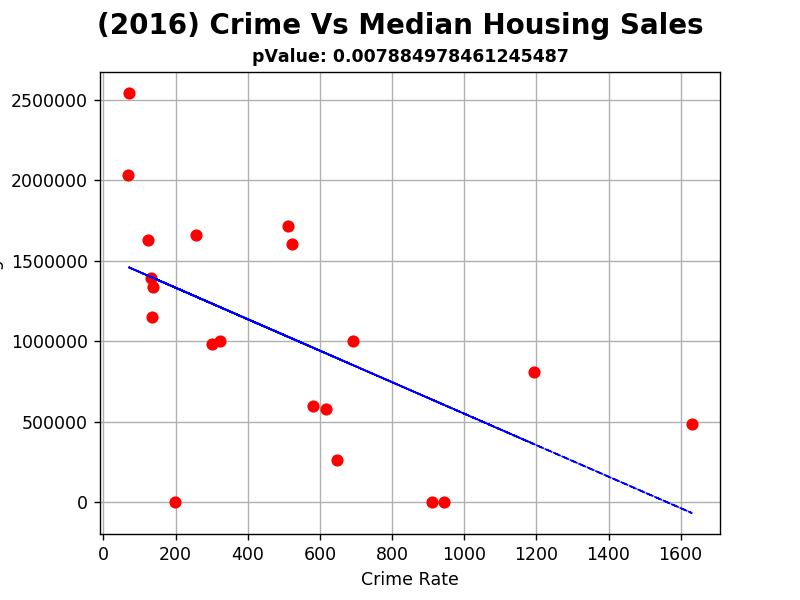

In [14]:
#@author Tasneem
# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime20_rate2016, housing20_median2016)

fit = vc_slope * crime20_rate2016 + vc_int

# Plot data
fig, ax = plt.subplots()
fig.suptitle("(2016) Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")

ax.set_xlabel("Crime Rate")
ax.plot(crime20_rate2016, housing20_median2016, linewidth=0, marker='o',color="r")
ax.plot(crime20_rate2016, fit, "b--", linewidth=1)
ax.set_ylabel("Median Housing Sales")
plt.grid(True)
plt.title("pValue: "+ str(vc_p),fontsize=10, fontweight="bold")
plt.show()

plt.savefig("images/plots/CrimeVsHousingMedian_2016_top20_PVALUE.png")